In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


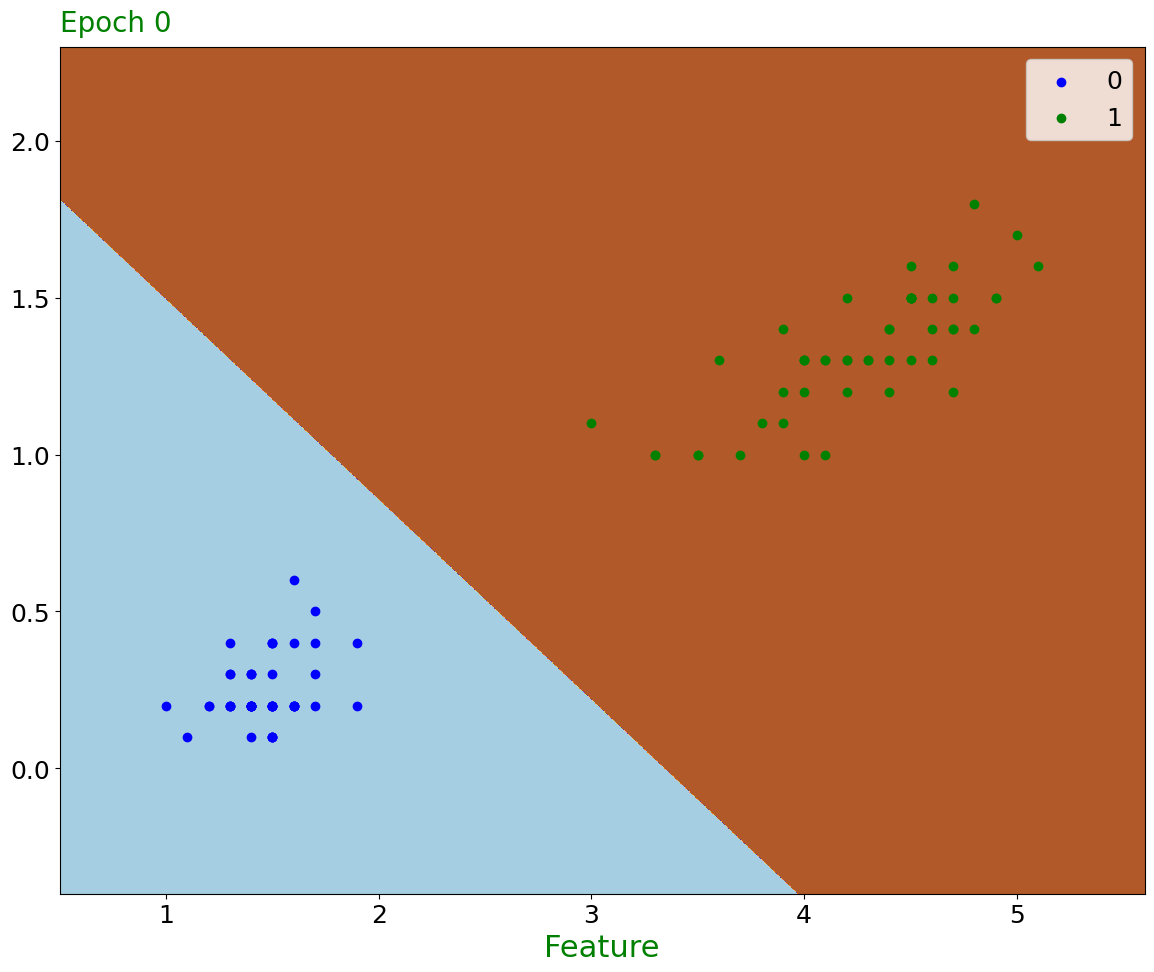

In [2]:
# random space
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib.colors import LogNorm
import matplotlib
font = {'size': 18}
matplotlib.rc('font', **font)

#%matplotlib qt


iris = np.genfromtxt('/content/drive/Othercomputers/My Laptop/Advanced/D-Learning/231006/code - update_1/iris_Petal.csv', dtype=None, delimiter=',', skip_header=1)
x_data = iris[:, :2]
y = iris[:, 2]

intercept = np.ones((x_data.shape[0], 1))
X = np.concatenate((intercept, x_data), axis=1)
theta = np.array([0.1, -0.1, 0.02])

def sigmoid_function(z):
    return 1 / (1 + np.exp(-z))

def one_update(theta):
    z = np.dot(X, theta)
    y_hat = sigmoid_function(z)
    gradient = np.dot(X.T, (y_hat - y)) / y.size
    theta -= 0.3*gradient
    return theta

def update_plot(i):
    plt.cla()
    global theta
    theta = one_update(theta)

    Z = np.dot(np.c_[intercept, xx.ravel(), yy.ravel()], theta)
    Z = sigmoid_function(Z).round()
    Z = Z.reshape(xx.shape)
    Z = Z.astype(np.int32)
    ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)

    plt.scatter(x_data[y == 0][:, 0], x_data[y == 0][:, 1], color='b', label='0', zorder=8)
    plt.scatter(x_data[y == 1][:, 0], x_data[y == 1][:, 1], color='g', label='1', zorder=9)
    plt.legend()
    ax.set_xlabel('Feature', fontsize=22, color='g')
    ax.text(0.5, 2.35, 'Epoch '+str(i), fontsize=20, color='g')


numframes = 80
fig, ax = plt.subplots(figsize=(14, 11))

# plot the decision boundary
x_min, x_max = x_data[:, 0].min() - 0.5, x_data[:, 0].max() + 0.5
y_min, y_max = x_data[:, 1].min() - 0.5, x_data[:, 1].max() + 0.5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 1000), np.linspace(y_min, y_max, 1000))
intercept = np.ones((xx.ravel().shape[0], 1))
Z = np.dot(np.c_[intercept, xx.ravel(), yy.ravel()], theta)
Z = sigmoid_function(Z).round()
Z = Z.reshape(xx.shape)
Z = Z.astype(np.int32)
ax.contourf(xx, yy, Z, cmap=plt.cm.Paired)


plt.scatter(x_data[y == 0][:, 0], x_data[y == 0][:, 1], color='b', label='0', zorder=8)
plt.scatter(x_data[y == 1][:, 0], x_data[y == 1][:, 1], color='g', label='1', zorder=9)
plt.legend()
ax.set_xlabel('Feature', fontsize=22, color='g')
ax.text(0.5, 2.35, 'Epoch '+str(0), fontsize=20, color='g')

ani = animation.FuncAnimation(fig, update_plot, interval=100, frames=range(numframes), fargs=())
#HTML(ani.to_html5_video())
writervideo = animation.FFMpegWriter(fps=7)
ani.save('animation_2D_logistic.mp4', writer=writervideo)